# Programming for Data Analytics - Assignment 5 - risk

************************
*Task 05 of the assessment - Risk game*  <img src="https://w7.pngwing.com/pngs/402/641/png-transparent-dice-gambling-graphy-cube-two-dice-game-white-casino.png" width=5% height=5%>
************************

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
One battle round is one shake of the attacker and defender dice.

*Rules of Risk*

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

***********

Import nessesary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulation of single round of the battle:

The attacker rolls 3 dice, and the defender rolls 2 dice.
The losses for both sides are returned.

I am creating a function `battle_round()`.

The attacker rolls 3 dice using `np.random.randint(1, 7, 3)`, which generates 3 random integers between 1 and 6. Then by using `np.sort(...)[::-1][:2]` I am sorting the dice in descending order and picking the top 2 dice.

We use similar for the defender `np.random.randint(1, 7, 2)` so selecting the top 2 sorted dice.

To initiate start, we need to set up a value for beginning of the round for the players. I set them to zero, as I will be now comparing the dice rolls. 


Then, I need to compare the first highest dice of the attacker versus first highest dice of the defender. For example if the attacker dice is higher than the defender dice, the defender loses a troop. After that I need to check second dice (second from the array), as the defender can defend with up to 2 troops. The second highest dice of the attacker is compared with the second highest dice of the defender.

For this, I created a **loop** that runs the battle 1,000 times to simulate each round.

In [2]:
# Setting up number of battle rounds 

battle_round=1000


attacker_losses = 0 # set up a value for beginning
defender_losses = 0 # set up a value for beginning

# simulate each round by using loop 
for num in range (battle_round):
    # Attacker rolls 3 dice, defender rolls 2 dice
    attacker = np.sort(np.random.randint(1, 7, 3))[::-1][:2]  # selecting top 2 after sorting random int
    defender = np.sort(np.random.randint(1, 7, 2))[::-1]      # selecting top 2 after sorting random int, only two dices 


    if attacker[0] <= defender[0]: #risk battle rules is if the dice are equal, the attacker loses
        attacker_losses += 1  # Attacker loses a troop:  this is shourcut of `attacker_losses = attacker_losses + 1`  increment the attacker's loss count by 1. https://www.quora.com/What-does-a-1-mean-in-Python
    else:
        defender_losses += 1  # Defender loses a troop: this is shortcut of `defender_army = defender_army + 1` increment the defender's loss count by 1.

    # Compare the second highest dice
    if attacker[1] <= defender[1]:
        attacker_losses += 1  # Attacker loses a troop
    else:
        defender_losses += 1  # Defender loses a troop


Now, I am plotting the results in pie chart showing the proportion of losses between Attacker and Defender. 

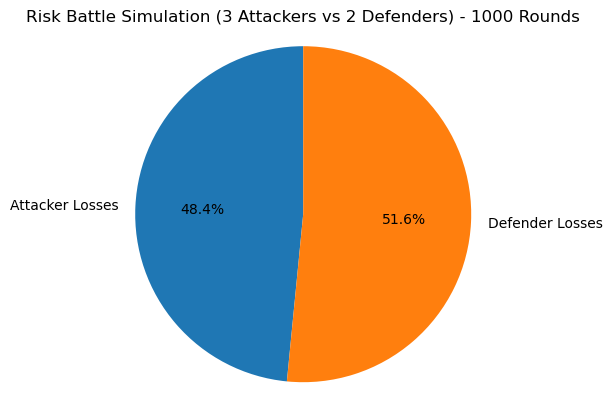

In [3]:
# plotting the results in pie chart

labels = ['Attacker Losses', 'Defender Losses']
sizes = [attacker_losses, defender_losses]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio for pie chart as a circle.
plt.title(f'Risk Battle Simulation (3 Attackers vs 2 Defenders) - 1000 Rounds')
plt.savefig('risk_battle_1000.png')
plt.show()

***
A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.
***

1. To simulate the battle with armies of arbitrary sizes until one side is wiped out, I will create a function `sim_battle`. As a initial part I am setting start sizes the attacker and defender armies based on input which is 100 troops for each army. 
2. To perfrom a battle I created a loop until either the attacker's army size drops to 1 or the defender's army is completely defeated. Each round involves rolling 3 dices for attacker and 2 for defender. The rules are the same as above. The addition is to record army sizes after each round by subtracting 1 from the size of the army after loosing a troop. To track the sizes of both armies after the round I use `append()` which adds the current sizes of the attacker and defender armies (`attacker_army` and `defender_army`) to their respective lists. 
3. The result shows the total losses for both sides and the remaining army sizes and printing this in the plot. 


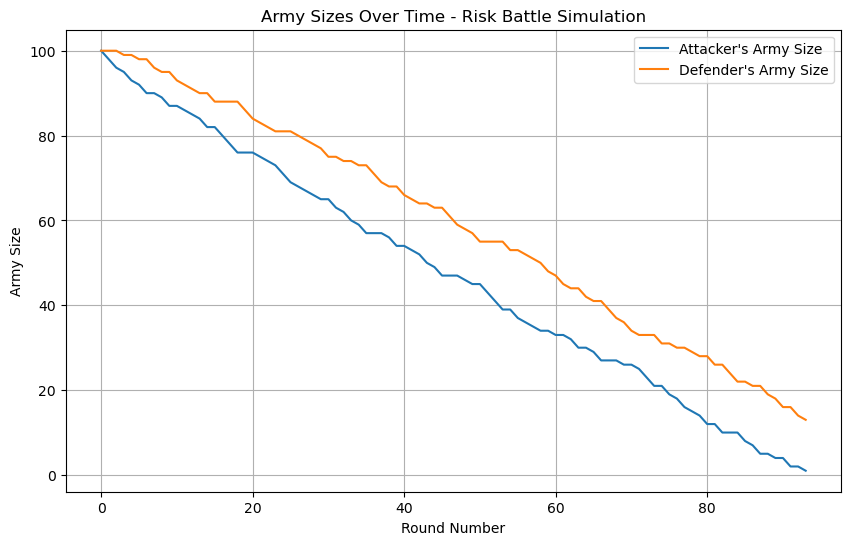

Final Result after the battle:
Attacker losses: 99
Defender losses: 87
Remaining Attacker Army Size: 1
Remaining Defender Army Size: 13


In [4]:
def sim_battle(attacker_army_size, defender_army_size):

    # set up start values
    attacker_losses = 0
    defender_losses = 0

     # initialize the army sizes based on the input parameters
    attacker_army = attacker_army_size
    defender_army = defender_army_size
    
    #  create a lists to track the army sizes over time
    attacker_sizes = [attacker_army]
    defender_sizes = [defender_army]
    
    # Continue the battle until either the attacker has 1 or more troops, or the defender is completely defeated
    while attacker_army > 1 and defender_army > 0:

        # let's simulate a round
        attacker = np.sort(np.random.randint(1, 7, 3))[::-1][:2]   # selecting top 2 after sorting random int
        defender = np.sort(np.random.randint(1, 7, 2))[::-1]       # selecting top 2 after sorting random int, only two dices

    # Compare the highest dice of attacker and defender (first dice)
        if attacker[0] <= defender[0]: #risk battle rules is if the dice are equal, the attacker loses
            attacker_losses += 1  # Attacker loses a troop:  this is shourcut of `attacker_losses = attacker_losses + 1`  increment the attacker's loss count by 1.
            attacker_army = attacker_army - 1   # Subtracting 1 from the size of the attacker's army. Alternatively `attacker_army -= 1`
        else:
            defender_losses += 1 # Increment the defender's loss count by 1.
            defender_army = defender_army - 1 # Subtract 1 from the size of the defender's army. Alternatively `defender_army -= 1`

    # Compare the second dice of attacker and defender
        if attacker[1] <= defender[1]: 
            attacker_losses += 1 # Attacker loses a troop
            attacker_army = attacker_army - 1 # Subtracting 1 from the size of the army
        else:
            defender_losses += 1 # Defender loses a troop
            defender_army -= 1 # this is a shortcut of presenting `defender_army = defender_army - 1` Subtracting 1 from the size of the army

        # Track the sizes of both armies after the round
        attacker_sizes.append(attacker_army)
        defender_sizes.append(defender_army)

        # Plot the results of the battle
    plt.figure(figsize=(10, 6))
    plt.plot(attacker_sizes, label="Attacker's Army Size")
    plt.plot(defender_sizes, label="Defender's Army Size")
    plt.xlabel('Round Number')
    plt.ylabel('Army Size')
    plt.title('Army Sizes Over Time - Risk Battle Simulation')
    plt.legend()
    plt.grid(True)
    plt.savefig('risk_battle_simulation.png')
    plt.show()

# Return the results of the simulation: losses for both sides and remaining army sizes
    return attacker_losses, defender_losses, attacker_army, defender_army


# Example usage with arbitrary army sizes
attacker_army_size =100 #Attackers start with 100 troops
defender_army_size =100  # Defenders start with 100 troops

# Run the simulation
attacker_losses, defender_losses, remaining_attacker, remaining_defender = sim_battle(attacker_army_size, defender_army_size)

# Print the final results
print(f'Final Result after the battle:')
print(f'Attacker losses: {attacker_losses}')
print(f'Defender losses: {defender_losses}')
print(f'Remaining Attacker Army Size: {remaining_attacker}')
print(f'Remaining Defender Army Size: {remaining_defender}')

    


References: 

1. https://www.quora.com/What-does-a-1-mean-in-Python
2. https://www.ultraboardgames.com/risk/game-rules.php
3. https://github.com/vsuhasm/SimulateRisk/blob/master/risk_serial.py


*******
End